In [1]:
import pandas as pd
import numpy as np
import os

# os.chdir(r"C:\Users\hkit\PycharmProjects\e_commerce\[20230620]RNN모델")

In [19]:
encoding = "UTF-8"  # "cp949" # "euc-kr"  # "ANSI"  # "ascii"

with open("0.txt", encoding=encoding) as f: a = f.read()
with open("1.txt", encoding=encoding) as f: b = f.read()
with open("1_.txt", encoding=encoding) as f: c = f.read()
with open("new_쇼핑.txt", encoding=encoding) as f: d = f.read()

In [20]:
#import random
import numpy as np
import pandas as pd

e = [(i, 0) for i in a.split("\n")[:-1]]  # 일상
f = [(i, 1) for i in b.split("\n")[:-1]]  # 스팸
g = [(i, 1) for i in c.split("\n")[:-1]]  # 스팸
h = [(i, 0) for i in d.split("\n")[:-1]]  # 일상

# data = e + f + g + h
data = e + f + g + h
#random.shuffle(data)

In [21]:
X = [i[0] for i in data]
y = np.array([i[1] for i in data])

In [22]:
pd.Series(y).value_counts()
# X_len.sort_values(ascending=False)
# len(X[50].split(" "))

0    2188
1     228
Name: count, dtype: int64

In [23]:
df = pd.DataFrame({"document": X, "label": y})

In [24]:
MAX_LEN = 1000
TRUNC = "pre"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target =\
    train_test_split(df["document"], df["label"], test_size=0.4, stratify=df["label"])

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_input)

train_sequences = tokenizer.texts_to_sequences(train_input)
train_seq = pad_sequences(train_sequences, maxlen=MAX_LEN, truncating=TRUNC)
val_sequences = tokenizer.texts_to_sequences(val_input)
val_seq = pad_sequences(val_sequences, maxlen=MAX_LEN, truncating=TRUNC)

In [25]:
import tensorflow as tf

model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.Embedding(input_dim=50000, output_dim=64, input_length=MAX_LEN))
# model2.add(tf.keras.layers.SimpleRNN(1, return_sequences=True))
model2.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(2, return_sequences=True)))
model2.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(2, return_sequences=False)))
model2.add(tf.keras.layers.Dropout(rate=0.3))
model2.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model2.fit(train_seq, train_target, epochs=50, batch_size=32, validation_data=(val_seq, val_target))

Epoch 1/50
46/46 [==============================] - 28s 503ms/step - loss: 0.6107 - accuracy: 0.8999 - val_loss: 0.5003 - val_accuracy: 0.9059
Epoch 2/50
46/46 [==============================] - 21s 460ms/step - loss: 0.4455 - accuracy: 0.9061 - val_loss: 0.3779 - val_accuracy: 0.9131
Epoch 3/50
46/46 [==============================] - 21s 464ms/step - loss: 0.3486 - accuracy: 0.9317 - val_loss: 0.3030 - val_accuracy: 0.9193
Epoch 4/50
46/46 [==============================] - 21s 462ms/step - loss: 0.2857 - accuracy: 0.9331 - val_loss: 0.2536 - val_accuracy: 0.9162
Epoch 5/50
46/46 [==============================] - 21s 468ms/step - loss: 0.2515 - accuracy: 0.9400 - val_loss: 0.2217 - val_accuracy: 0.9152
Epoch 6/50
46/46 [==============================] - 21s 461ms/step - loss: 0.2165 - accuracy: 0.9365 - val_loss: 0.1985 - val_accuracy: 0.9121
Epoch 7/50
46/46 [==============================] - 21s 461ms/step - loss: 0.1987 - accuracy: 0.9413 - val_loss: 0.1813 - val_accuracy: 0.9121

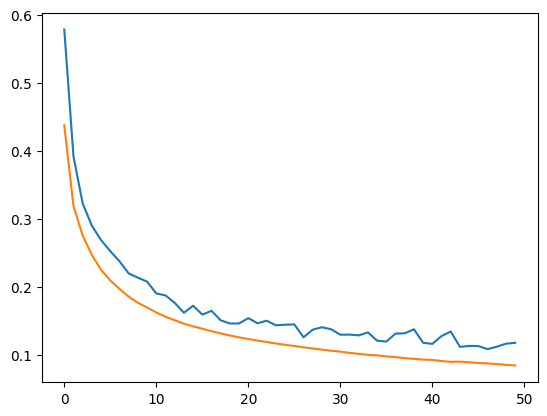

In [48]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

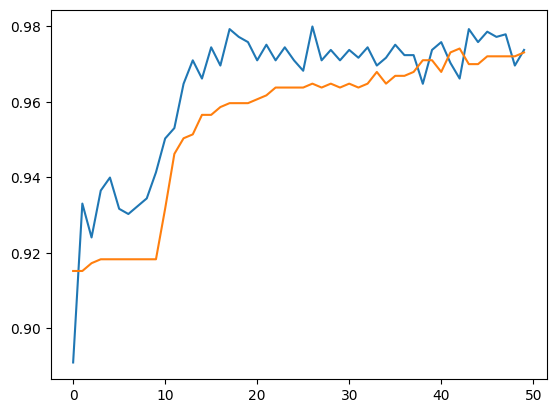

In [49]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [50]:
y[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
i = 5
sample_text = X[i]

real_sequences = tokenizer.texts_to_sequences([sample_text])
real_seq = pad_sequences(real_sequences, maxlen=MAX_LEN, truncating=TRUNC)
result = model2.predict(real_seq)
print(X[i])
print(result)

1/1 [==============================] - 0s 78ms/step
언니 지금 하고 싶은 공부 있엉~? 나 요새 머라도 배우고 싶은데 없다 아 진짜? 왜 전에는 어떤 거 배우고 싶었는데? 뭘 해야 될 지 모르겠어 컴퓨터 자격증 따려고 했는데 귀찮아 컴퓨터 자격증, 언니 사무직으로 갈 거 아니면 진짜 비츄! 근데 뭐라도 따야 되지 않을까? 시간 아까워 그거는 그런데 차라리 할 거면 미용 자격증 어때? 무슨 미용 자격증? 나 완전 똥손 키키 컴퓨터보다는 뭐든지 기술은 하나씩은 가지고 있어야 되겠더라! 근데 요새 기술이 최고긴 하더라 맞아 키키 언니 혹시 피부 미용에 관심 있어? 피부미용 따는 건 쉽대 근데 벌이가 될까? 피부 미용 요즘에 사람들 엄청 관심 있어 하잖아! 근데 그것도 서비스라 갑질 당할듯 아앗 ㅋ 또 생각해 보면 그렇게 되네 키키 키키 지금 일에 충실하자, 일개미
[[0.00722066]]


In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
y_hat = model2.predict(pad_sequences(tokenizer.texts_to_sequences(val_input), maxlen=MAX_LEN, truncating=TRUNC))

31/31 [==============================] - 1s 21ms/step


In [96]:
threshold = 0.35

y_hat_final = []
for i in y_hat:
    if i > threshold:
        y_hat_final.append(1.0)
    else:
        y_hat_final.append(0.0)

confusion_matrix(val_target, y_hat_final)

array([[874,   2],
       [  7,  84]])

In [30]:
import pickle as pk

with open("model_Bi-LSTM.pickle", "wb") as f:
    pk.dump(model2, f)

In [68]:
with open("tokenizer.pickle", "wb") as f:
    pk.dump(tokenizer, f)

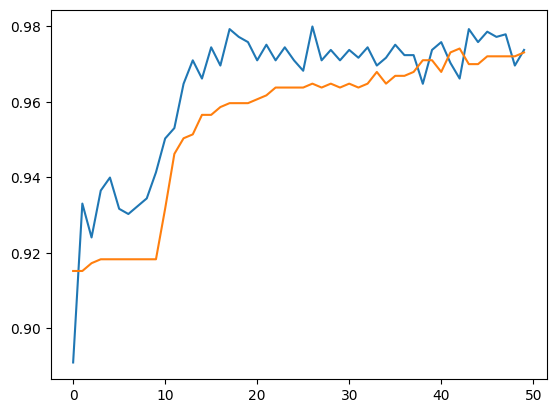

In [97]:
import matplotlib.pyplot as plt

# plt.plot(history.history["accuracy"])
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

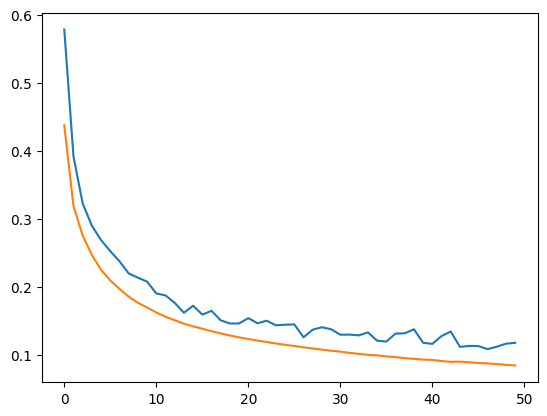

In [98]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [33]:
import pickle as pk

with open("model.pickle",'rb') as f:
    model = pk.load(f)

ValueError: Layer 'embedding_3' expected 1 variables, but received 0 variables during loading. Expected: ['embedding_3/embeddings:0']

In [12]:
from pydub import AudioSegment

audio = AudioSegment.from_file("쇼핑_462.m4a", format="m4a",encoding="utf-8")
audio.export("쇼핑_462.wav", format="wav")

C:\Users\HKIT\anaconda3\lib\site-packages\pydub\utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)


FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다

In [15]:
import urllib.parse
from pydub import AudioSegment

# 파일 경로를 인코딩하여 사용
encoded_path = urllib.parse.quote("쇼핑_462.m4a")
audio = AudioSegment.from_file(encoded_path, format="m4a", encoding="utf-8")
wav = audio.export("쇼핑_462.wav", format="wav")

In [16]:
wav